# Обработка данных


## 1. Описание задачи совами

Задача заключается в том, чтобы с помощью имеющихся данных спрогнозировать, останется ли кандидат работать в компании после завершения обучения или будет искать новую работу. Компания, занимающаяся Big Data и Data Science, проводит курсы для потенциальных кандидатов, чтобы выявить наиболее подходящих специалистов для найма. Однако среди участников курсов есть те, кто лишь использует обучение как возможность для поиска других рабочих мест.

Цель анализа — выявить факторы, которые влияют на решение кандидата остаться в компании или уйти после обучения. В случае успешного решения этой задачи компания сможет оптимизировать процесс отбора, улучшить качество обучения, снизить затраты и время, а также правильно планировать курсы, нацеленные на наиболее заинтересованных кандидатов.

Данные включают информацию о кандидатах, собранную на этапе регистрации, в том числе демографические данные, уровень образования, опыт работы и другую информацию, связанную с текущей занятостью кандидатов:




- **enrollee_id** : Unique ID for candidate
- **city** – City code
- **city_development_index** – Development index of the city (scaled)
- **gender** – Gender of candidate
- **relevent_experience** – Relevant experience of candidate
- **enrolled_university** – Type of University course enrolled, if any
- **education_level** – Education level of candidate
- **major_discipline** – Education major discipline of candidate
- **experience** – Candidate total experience in years
- **company_size** – Number of employees in current employer's company
- **company_type** – Type of current employer
- **lastnewjob** – Difference in years between previous job and current job
- **training_hours** – Training hours completed
- **target** – 0: Not looking for job change, 1: Looking for a job change

## 2. Чтение данных

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# pd.set_option('display.max_columns', 200)

In [2]:
data_path_train = "data_HRAnalytics/aug_train.csv"
data = pd.read_csv(data_path_train)

In [3]:
data.shape

(19158, 14)

In [4]:
data

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


## 3. Визуализация данных и вычисление основных характеристик


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

Проверим наличие **missing values**  для каждого поля:

In [6]:
data.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

Из приведенных выше данных можно увидеть, что 8 из 14 столбцов имеют пропущенные значения(причем в столбцах 'gender', 'major_experience', 'company_size' и 'company_type' пропусков много).

In [7]:
data.describe( )

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


Проверим наличие **outliesr** в числовых признаках с помощью *box plots*:

In [8]:
numeric_features = [c for c in data.columns if data[c].dtype.name != 'object']
numeric_features.remove('target')
numeric_features

['enrollee_id', 'city_development_index', 'training_hours']

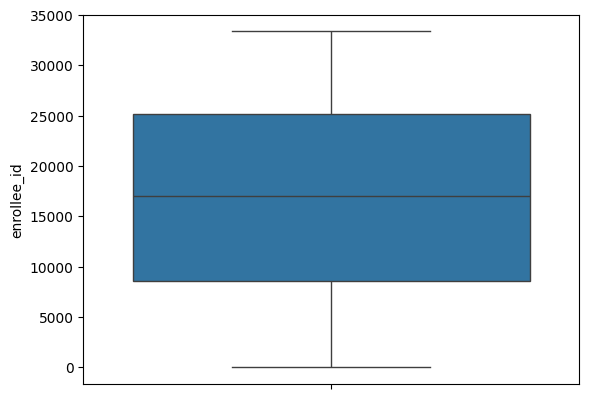

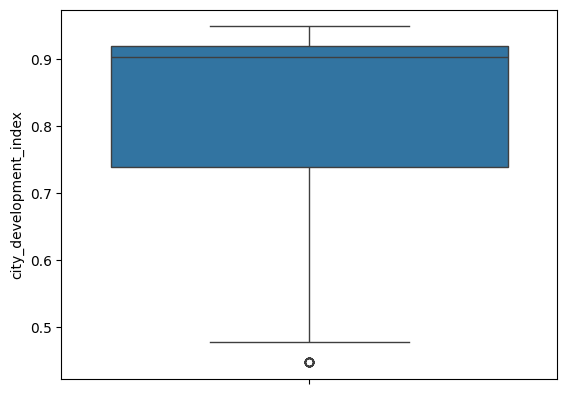

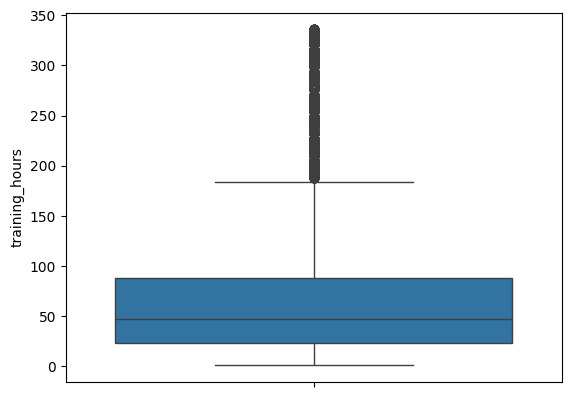

In [9]:
for col in numeric_features:
    sns.boxplot(y=data[col], orient='v')
    plt.show()

In [10]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
categorical_columns.remove('city')
categorical_columns

['gender',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'last_new_job']

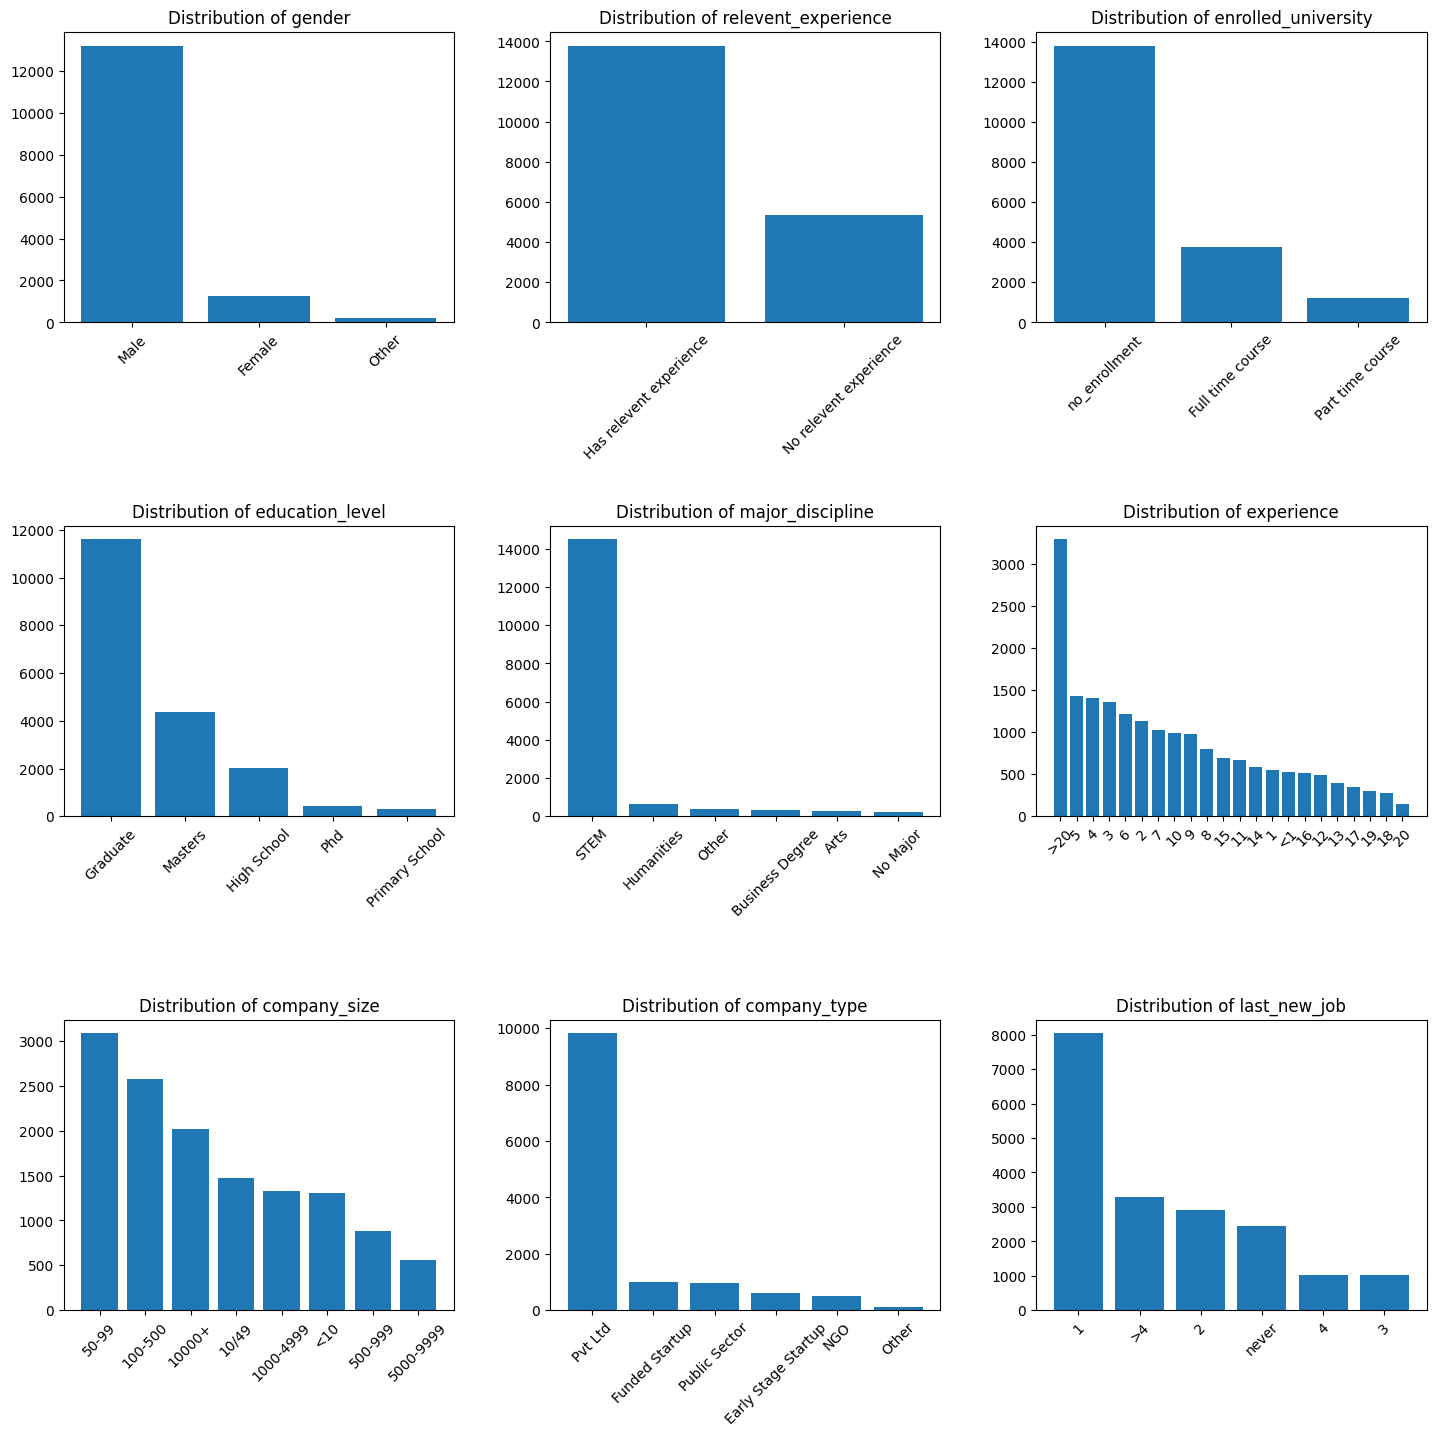

In [11]:
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
for i, col in enumerate(categorical_columns):
    data_counts = data[col].value_counts()
    axs[i//3, i%3].bar(data_counts.index, data_counts.values)
    axs[i//3, i%3].set_title(f'Distribution of {col}')

    axs[i//3, i%3].tick_params(axis='x', rotation=45)


plt.tight_layout(pad=3.0)
plt.show()

In [12]:
data['city'].value_counts()

city
city_103    4355
city_21     2702
city_16     1533
city_114    1336
city_160     845
            ... 
city_129       3
city_111       3
city_121       3
city_140       1
city_171       1
Name: count, Length: 123, dtype: int64

Все категориальные признаки не сбалансированы.

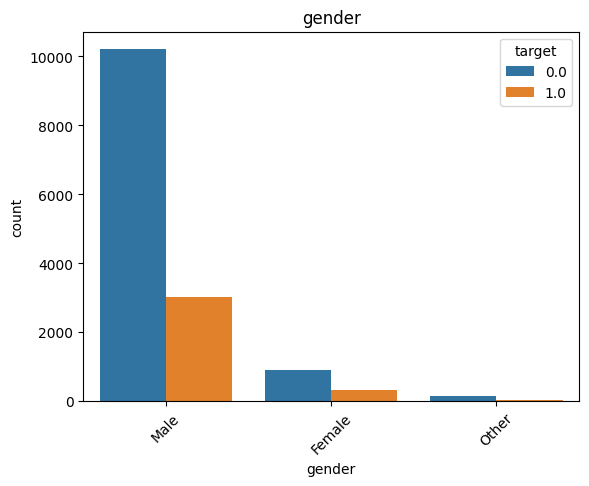

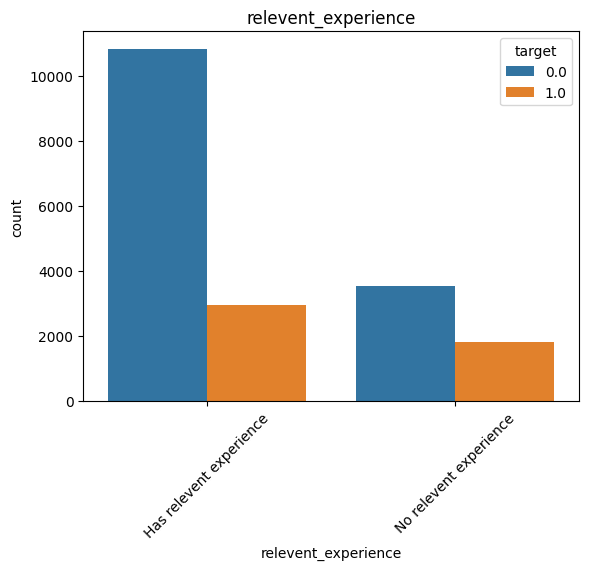

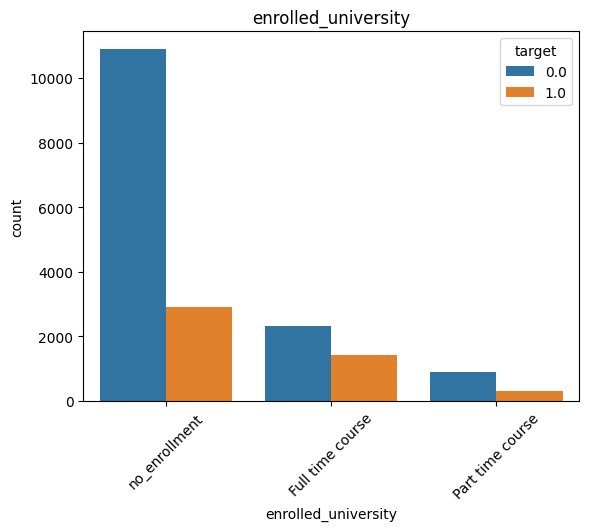

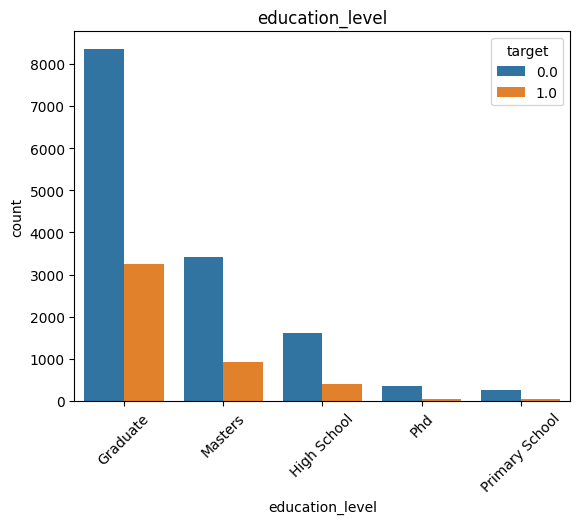

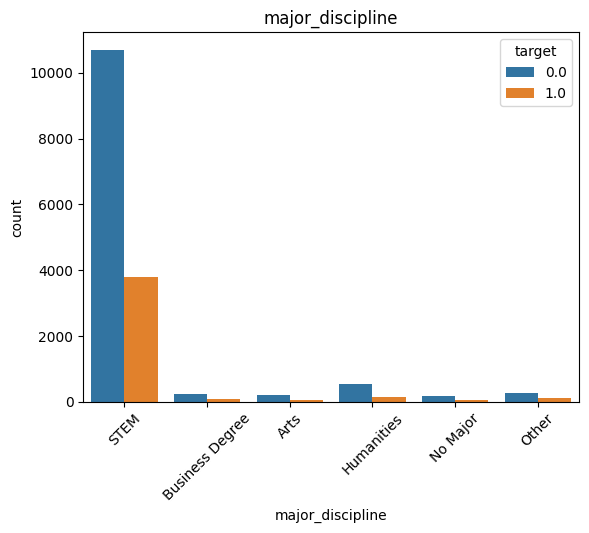

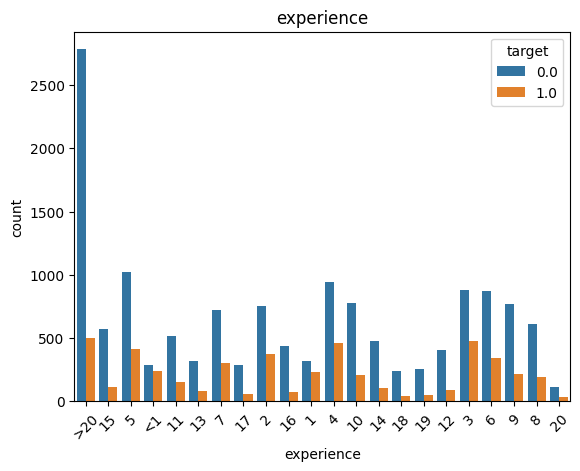

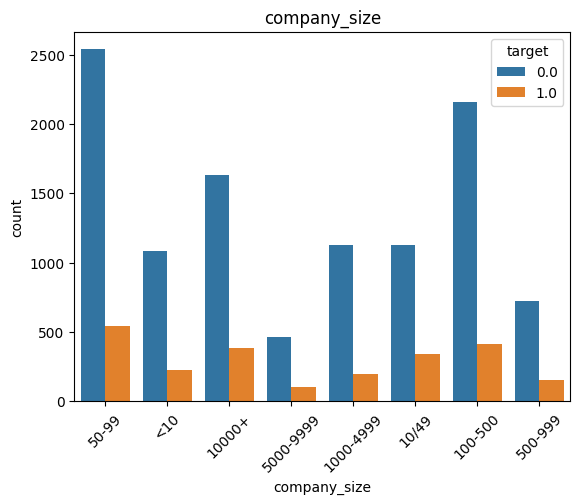

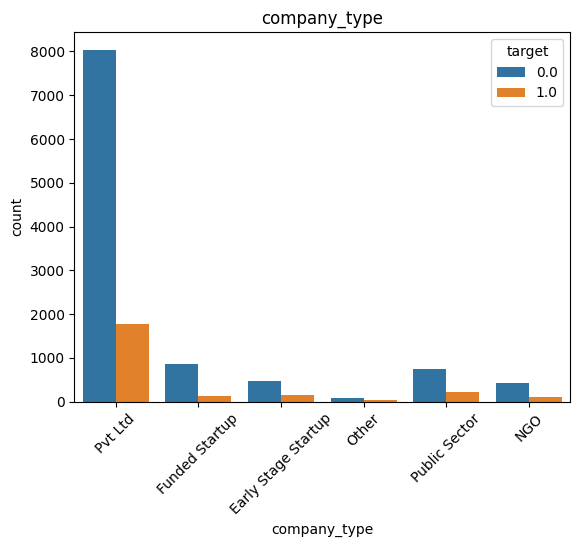

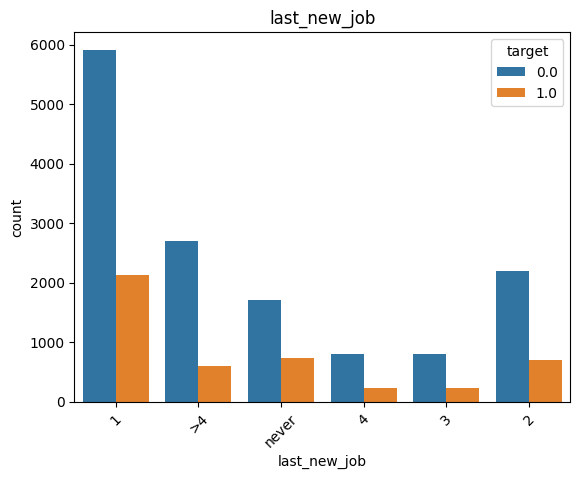

In [13]:
for col in categorical_columns:
    sns.countplot(x=col, data=data, hue='target')
    plt.tick_params(axis='x', rotation=45)
    plt.title(col)
    plt.show()

Из графиков можно сделать некоторые выводы:

- Люди, учащиеся на очном отделении ищут новую работу чаще тех, кто учится на заочном, или не учится вообще
- Те, у кого есть релевантный опыт работы чаще остаются в компании после курсов, чем те, у кого нет опыта работы
- Люди, получившие Phd или окончившие только среднюю школу чаще остаются в компании, чем все остальные

## 4. Обработка пропущенных значений

- в полях **gender**, **education_level**, **major_discipline**, **company_size**, **company_type**  заполним пропущенные значения категорией *unknown*
- в полях **enrolled_university**, **last_new_job**, **experience** заполним пропущенные значения наиболее частыми категориями

In [14]:
data_cleaned = data.copy()

In [15]:
miss_dict1 = {'gender' : 'unknown',
             'education_level' : 'unknown', 
             'company_size' : 'unknown', 
             'company_type' : 'unknown',
             'major_discipline' : 'unknown'}
miss_dict2 = {'enrolled_university' : data_cleaned['enrolled_university'].mode()[0],
            'last_new_job' : data_cleaned['last_new_job'].mode()[0],
            'experience' : data_cleaned['experience'].mode()[0]}

data_cleaned.fillna(miss_dict1, inplace = True)
data_cleaned.fillna(miss_dict2, inplace = True)

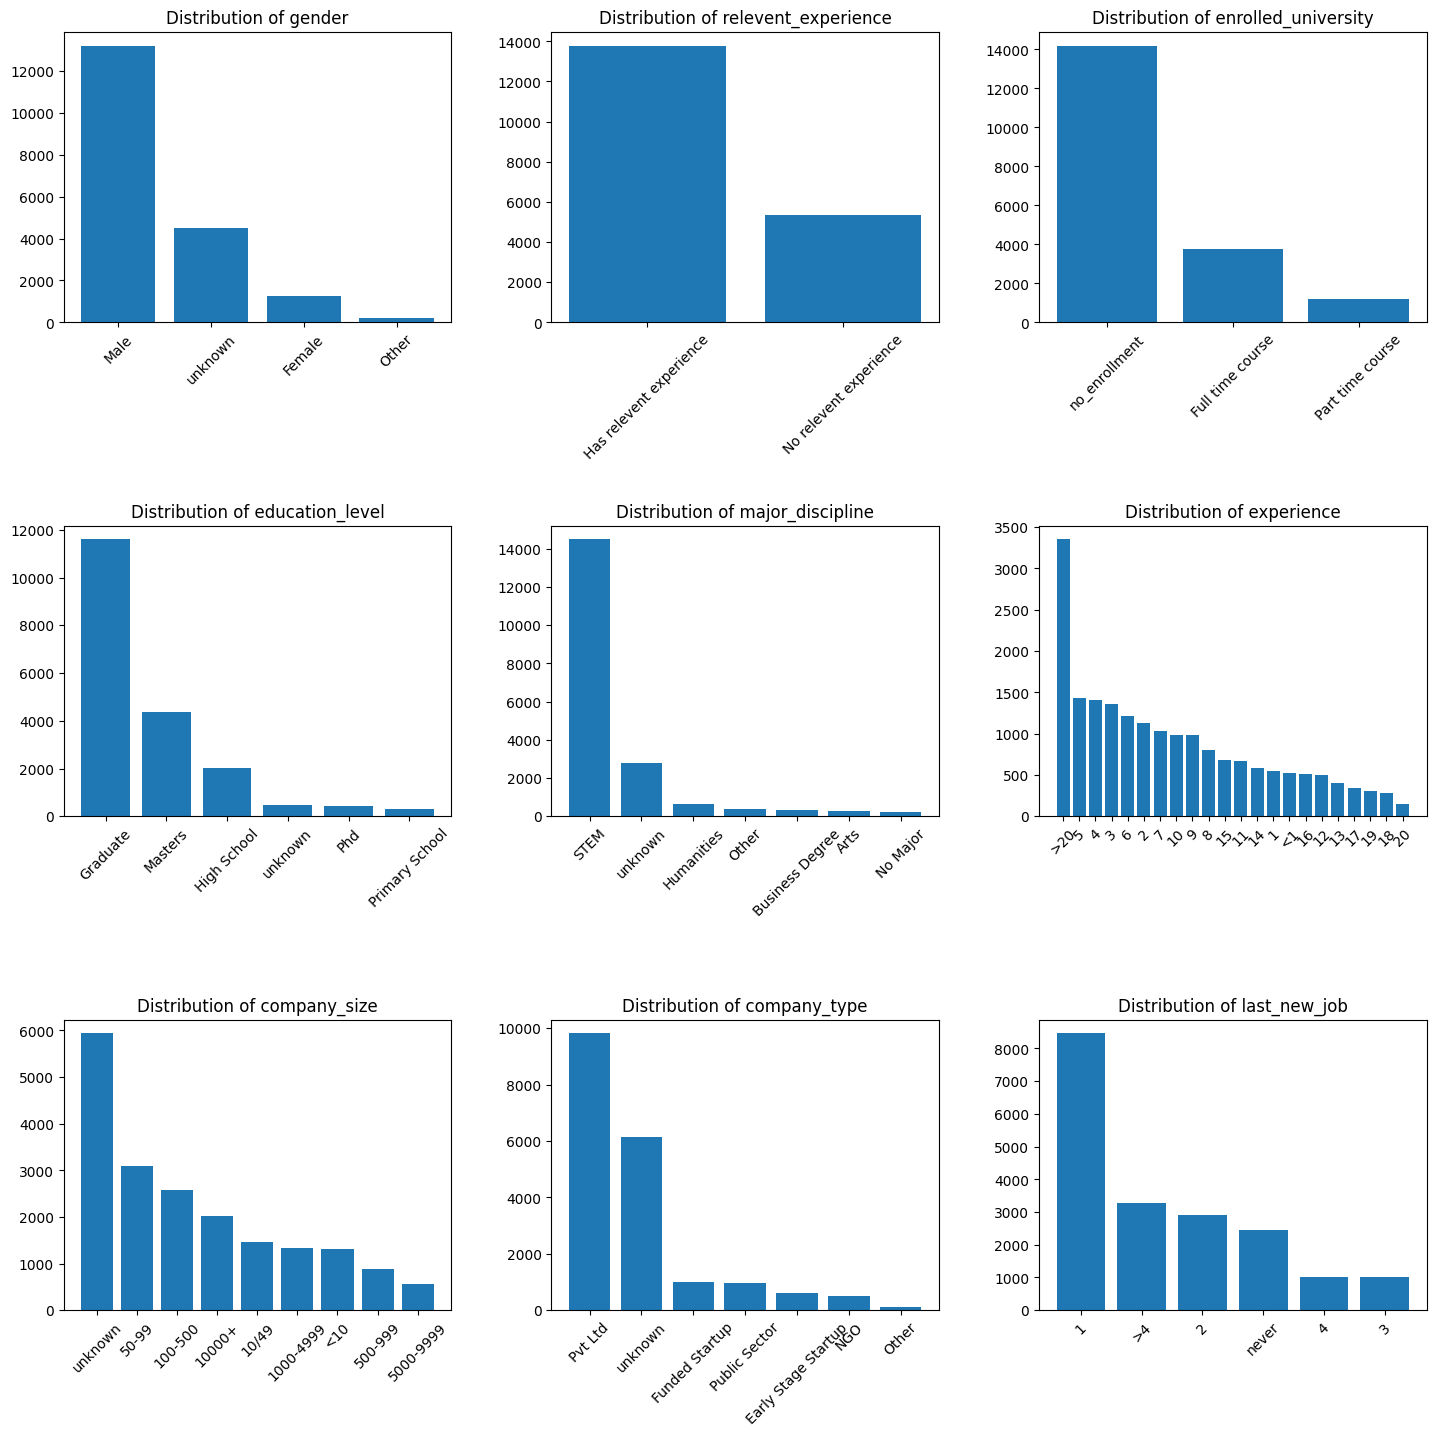

In [16]:
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
for i, col in enumerate(categorical_columns):
    data_counts = data_cleaned[col].value_counts()
    axs[i//3, i%3].bar(data_counts.index, data_counts.values)
    axs[i//3, i%3].set_title(f'Distribution of {col}')

    axs[i//3, i%3].tick_params(axis='x', rotation=45)


plt.tight_layout(pad=3.0)
plt.show()

Проверим, что мы удалили все пропущенные значения:

In [17]:
data_cleaned.isna().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

## 5. Обработка выбросов

По построенным ранее *box plots* мы увидели, что выбросы есть у полей **training_hours** и **city_development_index**

In [18]:
Q1_th = data_cleaned['training_hours'].quantile(0.25)
Q3_th = data_cleaned['training_hours'].quantile(0.75)
IQR_th = Q3_th - Q1_th

In [19]:
n = data_cleaned[(data_cleaned['training_hours'] < Q1_th - 1.5*IQR_th) | (data_cleaned['training_hours'] > Q3_th + 1.5*IQR_th)]
n.shape[0]

984

In [20]:
Q1_cdi = data_cleaned['city_development_index'].quantile(0.25)
Q3_cdi = data_cleaned['city_development_index'].quantile(0.75)
IQR_cdi = Q3_cdi - Q1_cdi

In [21]:
n = data_cleaned[(data_cleaned['city_development_index'] < Q1_cdi - 1.5*IQR_cdi) | (data_cleaned['city_development_index'] > Q3_cdi + 1.5*IQR_cdi)]
n.shape[0]

17

In [22]:
(17 + 984)/19158

0.05224971291366531

Так как строки с выбросами составляют всего 5% от всего датасета, просто удалим все строки в которых содержатся выбросы в полях **training_hours** и **city_development_index**

In [23]:
data_cleaned = data_cleaned[(data_cleaned['training_hours'] >= (Q1_th - 1.5 * IQR_th)) & (data_cleaned['training_hours'] <= (Q3_th + 1.5 * IQR_th))]
data_cleaned = data_cleaned[(data_cleaned['city_development_index'] >= (Q1_cdi - 1.5 * IQR_cdi)) & (data_cleaned['city_development_index'] <= (Q3_cdi + 1.5 * IQR_cdi))]


## 6. Обработка категориальных признаков

Создадим два разных датасета: в **data_encoded_mod** будет присутстовать *one-hot encoding*, а в **data_encoded_matr** - нет. По второму построим корреляционную матрицу и затем сбалансируем **target** с помощью SMOTE

1. В нашем датасете 10 категориальных полей. Для кодирования поля **city** воспользуемся *mean encoding*, для полей **experience**, **education_level**, **last_new_job**, **company_size** - *ordinal encoding*, так как порядок значений важн. Для кодирования остальных полей применим *one-hot encoding*

In [24]:
data_encoded_mod = pd.get_dummies(data_cleaned, columns=['gender', 'relevent_experience', 'enrolled_university', 'major_discipline', 'company_type'], drop_first=True)


In [25]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
data_encoded_mod['education_level'] = ordinal_encoder.fit_transform(data_encoded_mod[['education_level']])
data_encoded_mod['last_new_job'] = ordinal_encoder.fit_transform(data_encoded_mod[['last_new_job']])
data_encoded_mod['experience'] = ordinal_encoder.fit_transform(data_encoded_mod[['experience']])
data_encoded_mod['company_size'] = ordinal_encoder.fit_transform(data_encoded_mod[['company_size']])

In [26]:
mean_encoded = data_encoded_mod.groupby('city')['target'].mean().to_dict()
data_encoded_mod['city'] = data_encoded_mod['city'].map(mean_encoded)

In [27]:
data_encoded_mod.head(20)

,enrollee_id,city,city_development_index,education_level,experience,company_size,last_new_job,training_hours,target,gender_Male,...,major_discipline_No Major,major_discipline_Other,major_discipline_STEM,major_discipline_unknown,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,company_type_unknown
0,8949,0.215857,0.920,0.0,21.0,8.0,0.0,36,1.0,True,...,False,False,True,False,False,False,False,False,False,True
1,29725,0.151515,0.776,0.0,6.0,4.0,4.0,47,0.0,True,...,False,False,True,False,False,False,False,False,True,False
2,11561,0.592506,0.624,0.0,15.0,8.0,5.0,83,0.0,False,...,False,False,True,False,False,False,False,False,False,True
3,33241,0.372549,0.789,0.0,20.0,8.0,5.0,52,1.0,False,...,False,False,False,False,False,False,False,False,True,False
4,666,0.288000,0.767,2.0,21.0,4.0,3.0,8,0.0,True,...,False,False,True,False,True,False,False,False,False,False
5,21651,0.291667,0.764,0.0,2.0,8.0,0.0,24,1.0,False,...,False,False,True,False,False,False,False,False,False,True
6,28806,0.236478,0.920,1.0,15.0,4.0,0.0,24,0.0,True,...,False,False,False,True,True,False,False,False,False,False
7,402,0.289256,0.762,0.0,4.0,7.0,4.0,18,1.0,True,...,False,False,True,False,False,False,False,False,True,False
8,27107,0.215857,0.920,0.0,17.0,4.0,0.0,46,1.0,True,...,False,False,True,False,False,False,False,False,True,False
9,699,0.215857,0.920,0.0,8.0,3.0,4.0,123,0.0,False,...,False,False,True,False,False,False,False,False,True,False


2. Для полей **experience**, **education_level**, **last_new_job**, **company_size** используем *ordinal encoding*, для остальных - *mean encoding*

In [28]:
data_encoded_matr = data_cleaned.copy()

In [29]:
ordinal_encoder = OrdinalEncoder()
data_encoded_matr['education_level'] = ordinal_encoder.fit_transform(data_encoded_matr[['education_level']])
data_encoded_matr['last_new_job'] = ordinal_encoder.fit_transform(data_encoded_matr[['last_new_job']])
data_encoded_matr['experience'] = ordinal_encoder.fit_transform(data_encoded_matr[['experience']])
data_encoded_matr['company_size'] = ordinal_encoder.fit_transform(data_encoded_matr[['company_size']])


In [30]:

l = ['gender', 'relevent_experience', 'enrolled_university', 'major_discipline', 'company_type', 'city']
for col in l:
    mean_encoded = data_encoded_matr.groupby(col)['target'].mean().to_dict()
    data_encoded_matr[col] = data_encoded_matr[col].map(mean_encoded)

In [31]:
data_encoded_matr.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,0.215857,0.920,0.229524,0.215394,0.215843,0.0,0.263070,21.0,8.0,0.393212,0.0,36,1.0
1,29725,0.151515,0.776,0.229524,0.342531,0.215843,0.0,0.263070,6.0,4.0,0.180674,4.0,47,0.0
2,11561,0.592506,0.624,0.308775,0.342531,0.384097,0.0,0.263070,15.0,8.0,0.393212,5.0,83,0.0
3,33241,0.372549,0.789,0.308775,0.342531,0.215843,0.0,0.266234,20.0,8.0,0.180674,5.0,52,1.0
4,666,0.288000,0.767,0.229524,0.215394,0.215843,2.0,0.263070,21.0,4.0,0.139241,3.0,8,0.0


Наконец, когда все поля являются числовыми, мы можем построить корреляционную матрицу

In [32]:
corr_matr = data_encoded_matr.corr()

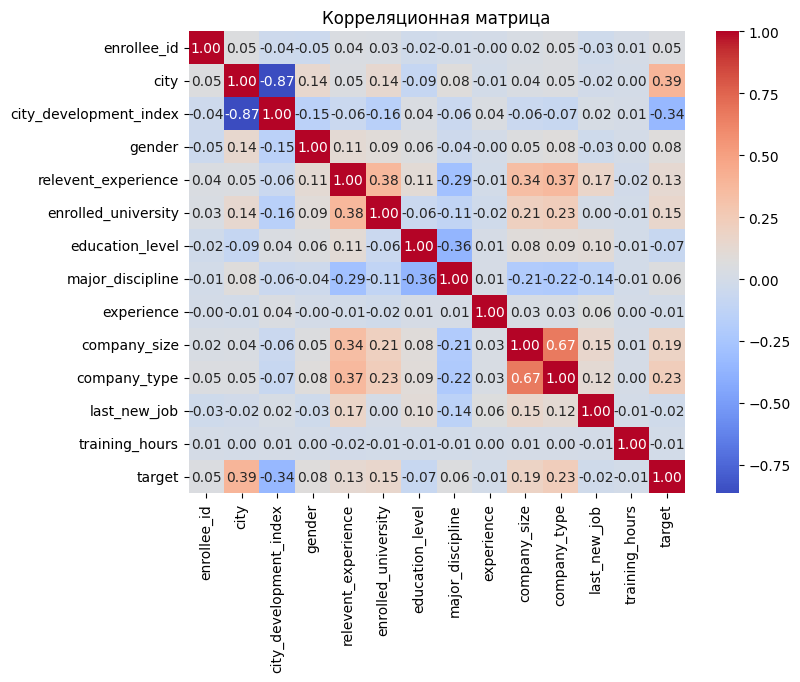

In [33]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Корреляционная матрица')
plt.show()

3. Поле **target** является несбалансированным. Воспользуемся методом SMOTE для балансировки поля.

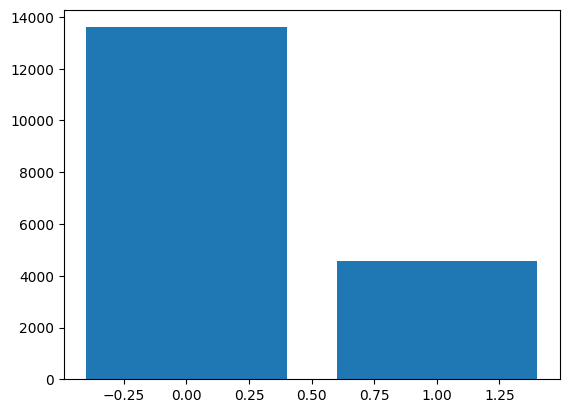

In [34]:
data_counts = data_cleaned['target'].value_counts()
plt.bar(data_counts.index, data_counts.values)
plt.show()

In [35]:
from imblearn.over_sampling import SMOTE

In [36]:
x_encoded = data_encoded_matr.drop('target', axis=1)
y_encoded = data_encoded_matr['target']

smote = SMOTE(random_state=42)
x_balanced, y_balanced = smote.fit_resample(x_encoded, y_encoded)

balanced_encoded_data = pd.DataFrame(x_balanced, columns=x_encoded.columns)
balanced_encoded_data['target'] = y_balanced

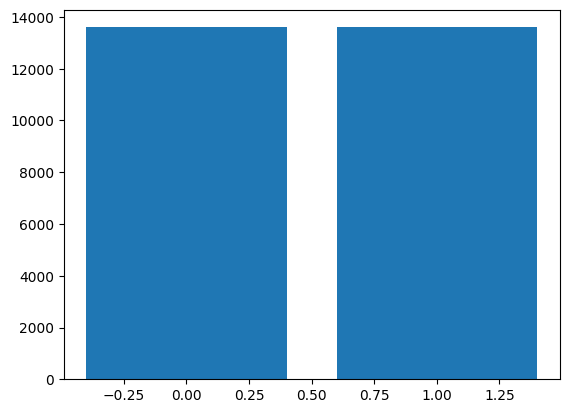

In [37]:
data_counts = balanced_encoded_data['target'].value_counts()
plt.bar(data_counts.index, data_counts.values)
plt.show()

In [38]:
corr_matr2 = balanced_encoded_data.corr()

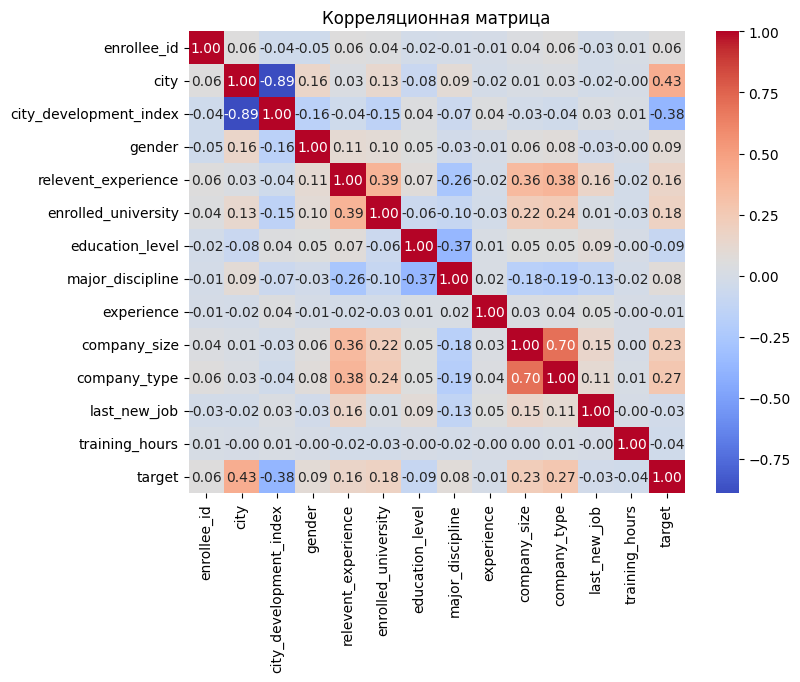

In [39]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matr2, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Корреляционная матрица')
plt.show()

Из корреляционной матрицы видно, что наибольшую корреляцию с *target* имеют поля *city*, *city_development_index*, *company_size*, *company_type*, *relevent_experience* и *education_level*. Однако, только у *city* и  *city_development_index* кореляция с *target* - уменернная. У остальных полей - слабая корреляция.

## 7. Нормализация данных

In [40]:
X = balanced_encoded_data[['city', 'city_development_index', 'company_size', 'company_type', 'relevent_experience', 'education_level']]
y = balanced_encoded_data['target']

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X), columns=X.columns, index=X.index)

# Применение алгоритмов машинного обучения

Метод K-ближайших соседей

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors=4)
KNN.fit(X_train, y_train)
y_pred_train = KNN.predict(X_train)
y_pred_test = KNN.predict(X_test)

In [44]:
err_train = 1 - KNN.score(X_train, y_train)
err_train

0.17779513809108038

In [45]:
err_test = 1 - KNN.score(X_test, y_test)
err_test

0.19977945230656124

Воспользуемся методом перебора гиперпараметров для количества ближайших соседей:

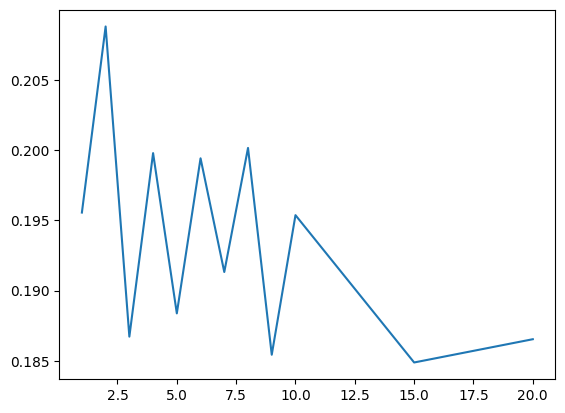

In [46]:
n_neighbors = [1,2,3,4,5,6,7,8,9,10,15,20]
errs = []
for n in n_neighbors:
    KNN = KNeighborsClassifier(n_neighbors=n)
    KNN.fit(X_train, y_train)
    y_pred_test = KNN.predict(X_test)
    errs.append(1 - KNN.score(X_test, y_test))

plt.plot(n_neighbors, errs)

Из графика следует, что оптимальным гиперпараметром метода является n = 15.

Теперь воспользуемся RandomForestClassifier и датасетом с несбалансированным *target*

In [47]:
X2 = data_encoded_mod.drop('target', axis=1)
y2 = data_encoded_mod['target']

X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [49]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=500, class_weight='balanced', random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=500,
                       random_state=42)

In [50]:
from sklearn.metrics import accuracy_score
y_pred_test = rfc.predict(X_test)
y_pred_train = rfc.predict(X_train)

accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_train = accuracy_score(y_train, y_pred_train)

print(accuracy_test)
print(accuracy_train)

0.786068281938326
1.0


## Общие выводы

В ходе анализа моделей K-ближайших соседей и Random Forest были получены следующие результаты: ошибка на тесте для K-ближайших соседей составила 19.98%, тогда как точность Random Forest достигла 78.61%. Более высокая точность Random Forest указывает на его эффективность в данной задаче, однако 19.98% ошибок K-ближайших соседей может свидетельствовать о недостатках в обработке данных.

Вероятные причины такой ошибки включают неправильную обработку пропусков или исключений, а также влияние несбалансированности классов в данных. Эти факторы могут значительно ухудшать качество модели. 